## In this notebook I will create model 1. This model will improve on, feature engieering, model performance, data balancing & deployment I/O (csv)
#### The workflow for this notebook will be as follows: 


1. **EDA** 
     * Bivariate  
     * Multivariate 
2. **Feature engineering**
     * Aggregate columns features 
     * NLP for text columns

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
#Load up data set from base model cleaning 
df = pd.read_csv('Cleaned1_Data.csv')
df.drop(columns =[ 'Unnamed: 0'], inplace = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Quickly data overview to refresh memory and get a second look since base model ipynb. 

In [34]:
df.shape

(7032, 20)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [37]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [38]:
df_d = df.describe()
df_d

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* 75% of customers have been with the company for 55 months 
* Average monthly charges is 64 dollars, and 75% of customers pay 89 dollars per month 
* Average Total charges is 2283, and 75% of customers pay 3794.737500 total charges 

In [39]:
# Categorical Category description

In [40]:
df.describe(include="O").T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,2,No,4065
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,2,No,5017
OnlineBackup,7032,2,No,4607
DeviceProtection,7032,2,No,4614
TechSupport,7032,2,No,4992


In [41]:
# The repeated no interent service and no are cleaned up earlier (base model) as you can see here the services columns are mostly yes and no now. 

In [42]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1.Exploratory Data Analysis (Bivariate)
* Categorical ()
* Numerical ()

In [5]:
def plot_categorical_feature(feature, data, rotate_xticks=False):
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    pareto_plot(x=feature, data=data, ax=ax1)
    
    plot_stacked_percentages_plot(feature=feature, data=data, ax=ax2)
    
    if rotate_xticks:
        ax1.tick_params(axis="x", labelrotation=45)
        ax2.tick_params(axis="x", labelrotation=45)
    
    plt.suptitle(f"{feature} Feature Distribution")
    plt.tight_layout

#### Bivariate Analysis 

In [6]:
#Splitting the dataframe into chruners and nonchurners to do bivariate analysis 
Churn_No=df.loc[df["Churn"]=='No']
Churn_Yes=df.loc[df["Churn"]=='Yes']

In [7]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

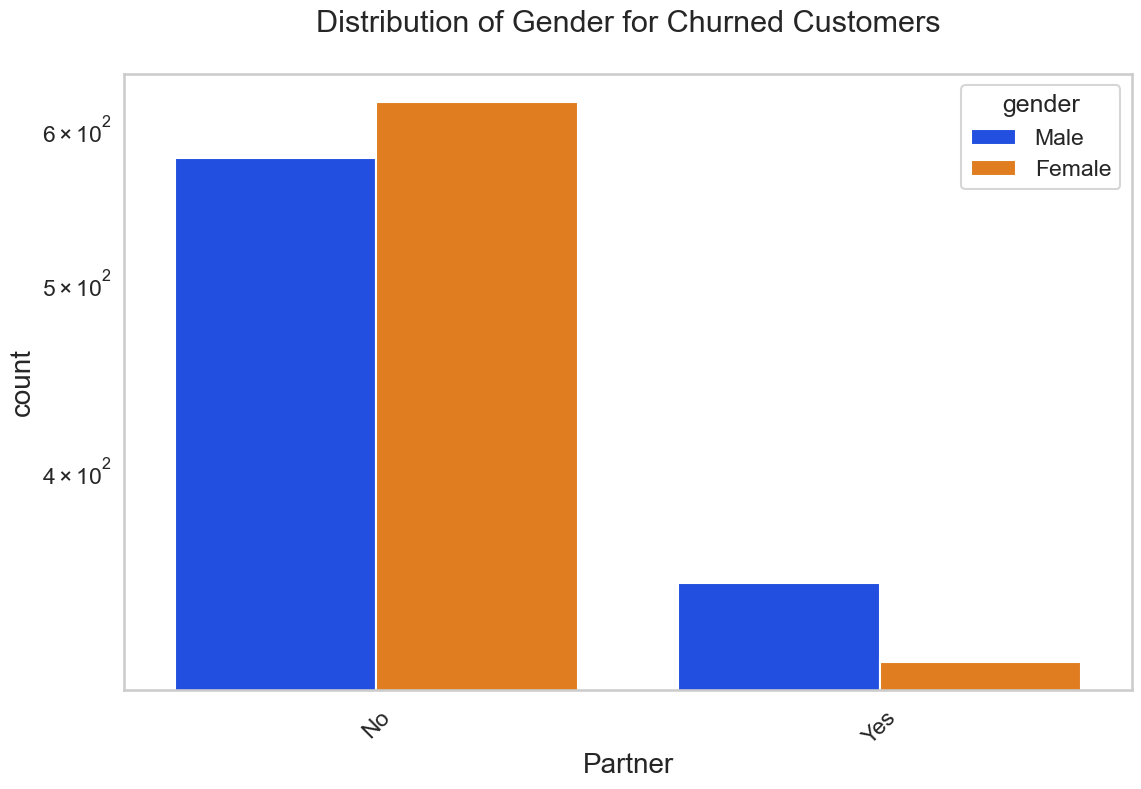

In [8]:
uniplot(Churn_Yes,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

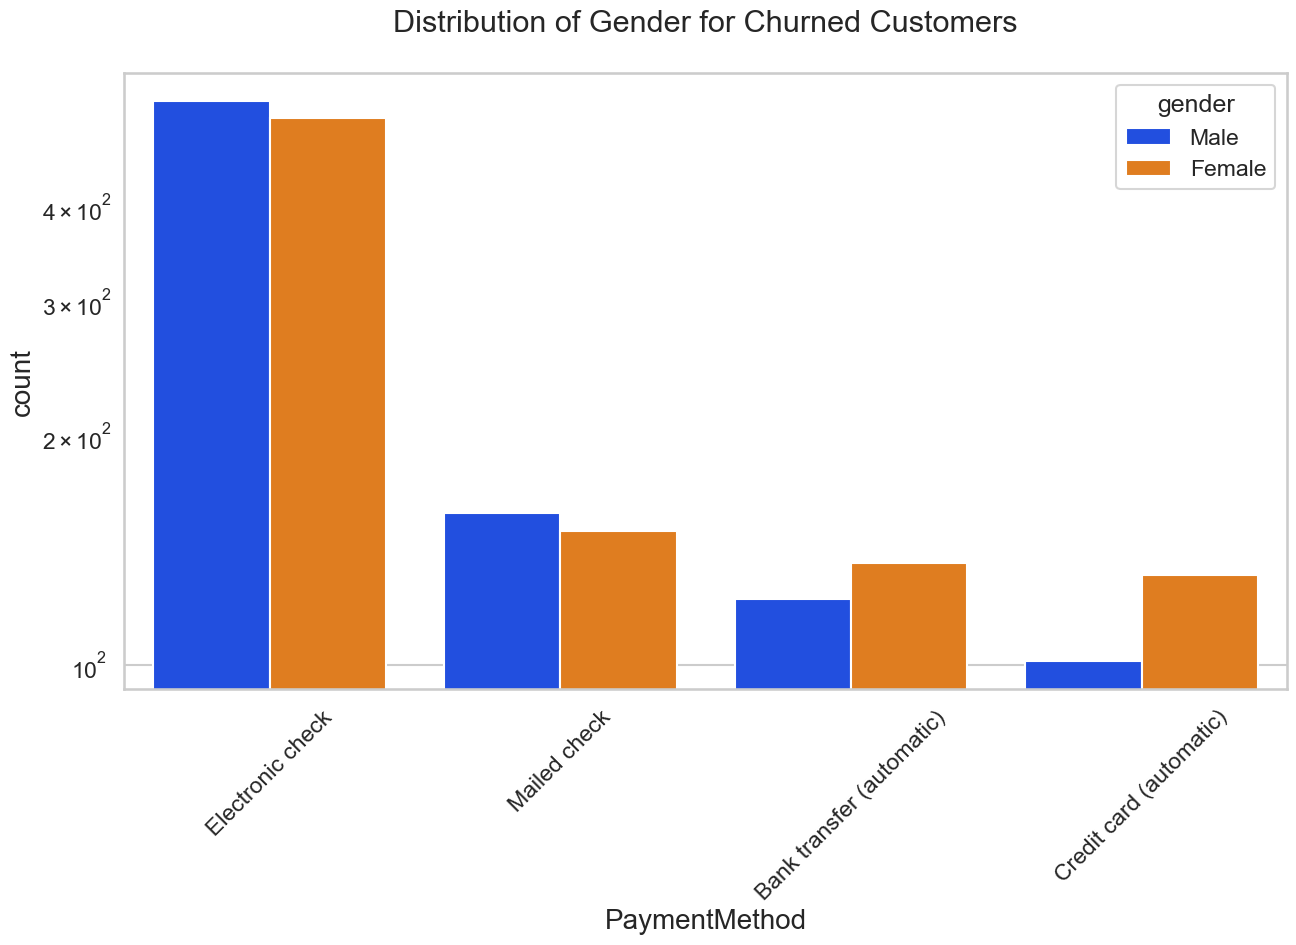

In [71]:
uniplot(Churn_Yes,col='PaymentMethod',title='Distribution of Gender for Churned Customers',hue='gender')

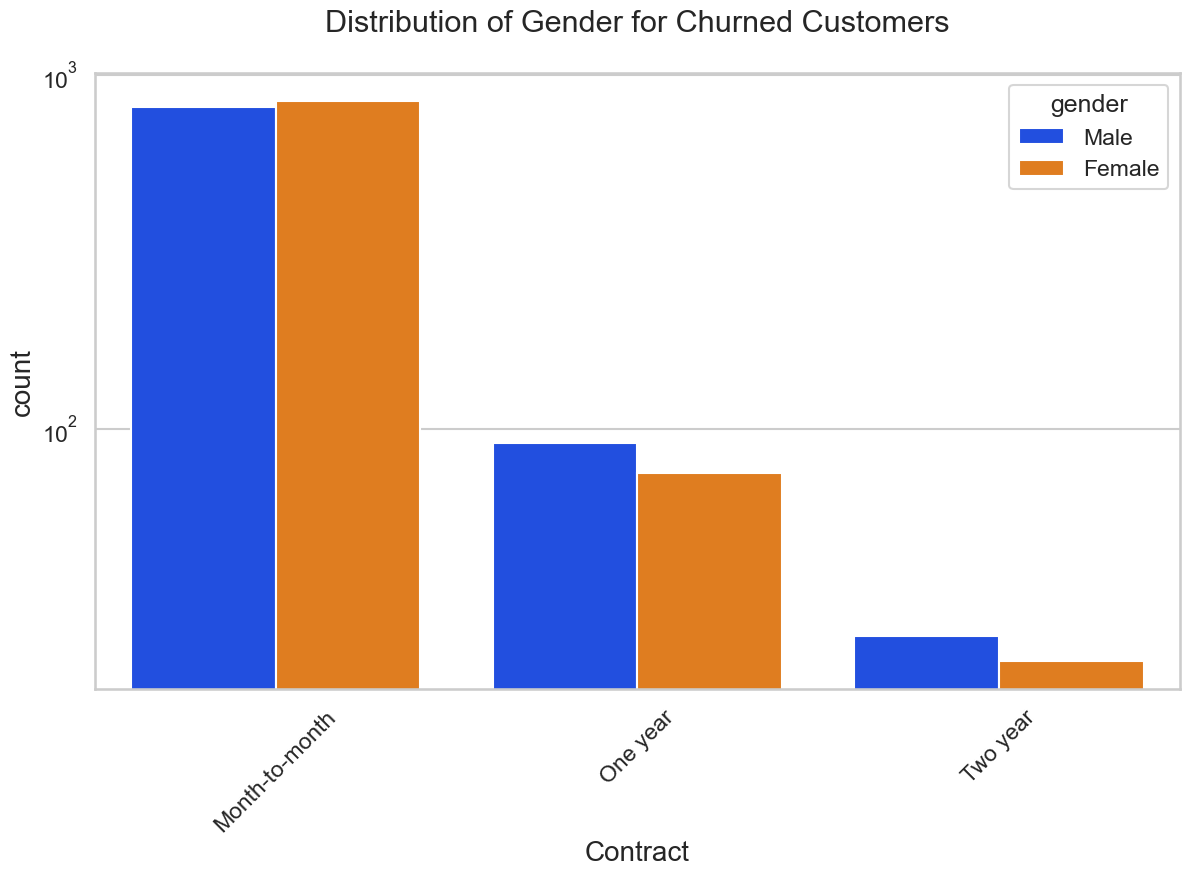

In [72]:
uniplot(Churn_Yes,col='Contract',title='Distribution of Gender for Churned Customers',hue='gender')

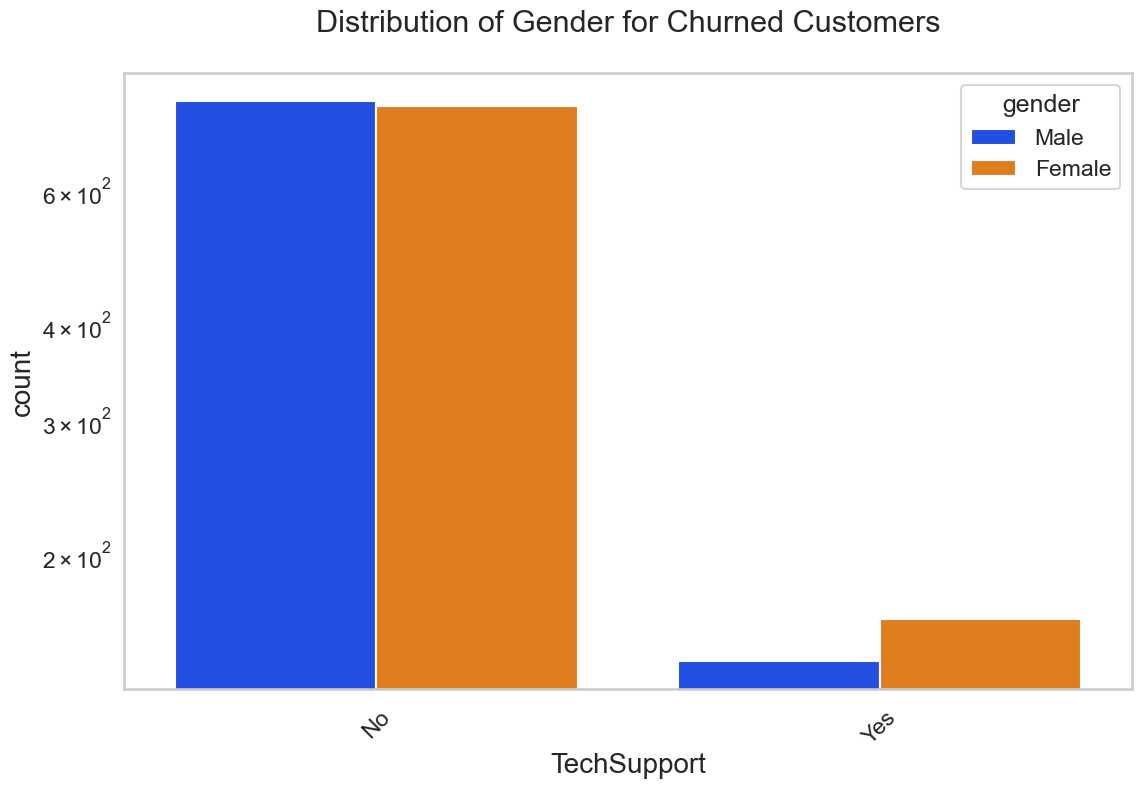

In [73]:
uniplot(Churn_Yes,col='TechSupport',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
# There are a lot more insights and really this EDA can take months with teams studying relationships between the features: 

## 2.Feature Engineering 

#### Leveraging some insights from EDA

* **Number of Services**
    * some features that represents offered services seems to be related and impact direclty in the amounts charged to each customer
    * some of those services may be offered together with each other, as service packages
    * will be used by other engineered features to help improve models predictive power 
    
* **Total Average Charges per Service**
    * Aggregates of charges create a simple representation of the cost-benefit of services throughout the entire history of the customer relationship with the comapany and it's relationship with the churn ratio
    
* **Monthly Average Charges per Service**
    * estimate the individual costs value of each service for a specific customer and if this value can impact in the customer's churn probability.

In [163]:
class NewFeaturesAdder(BaseEstimator, TransformerMixin):
    SERVICES_ = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy["NumberOfServices"] = (X_copy[self.SERVICES_] == "Yes").values.astype(int).sum(axis=-1) + (X_copy["InternetService"] != "No").values.astype(int)
        X_copy["TotalAvgChargesPerService"] = X_copy.TotalCharges / X_copy.NumberOfServices
        X_copy["MonthlyAvgChargesPerService"] = X_copy.MonthlyCharges / X_copy.NumberOfServices
        return X_copy

In [171]:
df = NewFeaturesAdder().transform(df).head()

In [172]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NumberOfServices,TotalAvgChargesPerService,MonthlyAvgChargesPerService
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,14.9250,14.9250
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,4,472.3750,14.2375
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,27.0375,13.4625
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,460.1875,10.5750
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,75.8250,35.3500


In [173]:
df.to_csv('Before_Model_Data.csv')

### Pipline 

In [100]:
from sklearn import compose as cmp
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import linear_model as lin
from sklearn.preprocessing import MinMaxScaler
# Pipeline
from sklearn import compose as cmp
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import linear_model as lin
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC

In [123]:
#Load up data set from base model cleaning 
df = pd.read_csv('Cleaned1_Data.csv')
df.drop(columns =[ 'Unnamed: 0'], inplace = True)

In [125]:
# Churn to 0 & 1 
df.Churn = df.Churn.map({'Yes': 1, 'No': 0}).astype(int)

In [126]:
df_F = pd.get_dummies(df)
df_F.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_F = 

In [127]:
# Data split
from sklearn import model_selection as mod
X = df_F.drop("Churn", axis = 1)
y = df_F.Churn

In [128]:
#Oversampling the Data since its unbalanced 
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [135]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [130]:
#Numerical Columns
numCols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Categorical Columns 
catCols = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies", "Contract","PaperlessBilling","PaymentMethod"]

In [129]:
# PreProcessing
preprocessor = cmp.ColumnTransformer(transformers=[
    ('num', pre. MinMaxScaler(), numCols),],
    remainder = 'passthrough')


In [131]:
# initializing  classification Models 
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42, max_iter = 3000)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [85]:
#initializing paramters dictionaries 

In [146]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [{0:0.25,1:1}, {0:0.5,1:1}, {0:0.75,1:1}, 'balanced']
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [{0:0.25,1:1}, {0:0.5,1:1}, {0:0.75,1:1}, 'balanced']
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param3['classifier__penalty'] = ['l1']
param3['classifier__solver'] = ['liblinear', 'saga']
param3['classifier__class_weight'] = [{0:0.25,1:1}, {0:0.5,1:1}, {0:0.75,1:1}, 'balanced']

param3['classifier__C'] = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param3['classifier__penalty'] = ['l2']
param3['classifier__solver'] =  ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
param3['classifier__class_weight'] = [{0:0.25,1:1}, {0:0.5,1:1}, {0:0.75,1:1}, 'balanced']
param3['classifier'] = [clf3]


param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [{0:0.25,1:1}, {0:0.5,1:1}, {0:0.75,1:1}, 'balanced']
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50,75]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2, 10**3, 10**4]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250, 300, 400]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [147]:
# Pipe
pipeline = Pipeline(steps =[('preprocessor', preprocessor),
                            ('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]


In [148]:
# Grid Search 

cv = mod.StratifiedKFold(n_splits = 5, shuffle = True)
grid = mod.GridSearchCV(pipeline, param_grid = params, cv = cv, verbose = 0, n_jobs = -1, scoring = "accuracy", refit = True)

grid.fit(xr_train, yr_train);
grid.best_estimator_[1]


GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       545
           1       0.96      0.98      0.97       623

    accuracy                           0.97      1168
   macro avg       0.97      0.96      0.97      1168
weighted avg       0.97      0.97      0.97      1168



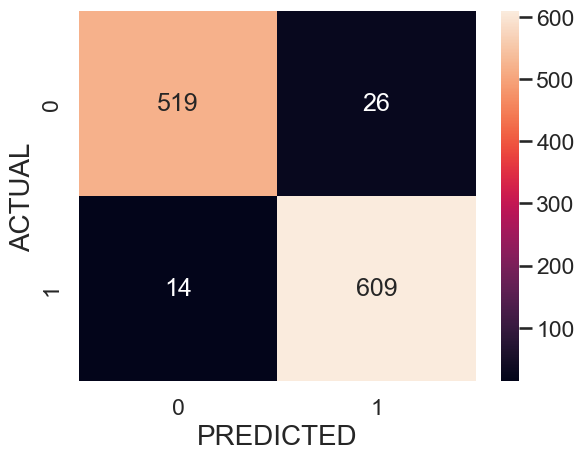

In [159]:
from sklearn import metrics as met
cm = met.confusion_matrix(yr_test, grid.best_estimator_.predict(xr_test))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["0", "1"] , 
                yticklabels = ["0", "1"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
     
print(met.classification_report(yr_test, grid.best_estimator_.predict(xr_test)))

In [153]:
df = pd.DataFrame(grid.cv_results_)

In [154]:
df['mean_test_score'] = grid.cv_results_['mean_test_score']
df['rank_test_score'] = grid.cv_results_['rank_test_score']
df = df.sort_values(by = ['rank_test_score'])

In [156]:
df = df[['rank_test_score', 'mean_test_score', 'param_classifier']]

In [157]:
df.head(10)

,rank_test_score,mean_test_score,param_classifier
276,1,0.960188,"GradientBoostingClassifier(max_depth=10, n_est..."
277,2,0.960188,"GradientBoostingClassifier(max_depth=10, n_est..."
278,3,0.959332,"GradientBoostingClassifier(max_depth=10, n_est..."
272,4,0.957620,"GradientBoostingClassifier(max_depth=10, n_est..."
269,5,0.957620,"GradientBoostingClassifier(max_depth=10, n_est..."
271,6,0.957192,"GradientBoostingClassifier(max_depth=10, n_est..."
270,7,0.956764,"GradientBoostingClassifier(max_depth=10, n_est..."
268,8,0.955480,"GradientBoostingClassifier(max_depth=10, n_est..."
275,8,0.955480,"GradientBoostingClassifier(max_depth=10, n_est..."
35,10,0.953980,RandomForestClassifier(random_state=42)
